In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
data = pd.read_pickle('freeze/freeze_df_ESH0.pickle')

In [3]:
data

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-02-20 03:44:30,True,3391.75,3397.50,3381.25,3382.25,3382.25,78409,NaN,NaN,16.250000,0.0,NaN,0.0
2020-02-20 08:23:30,True,3382.00,3391.25,3376.50,3390.50,3390.50,78373,NaN,NaN,15.495833,0.0,NaN,0.0
2020-02-20 10:31:00,True,3390.50,3390.50,3380.00,3383.00,3383.00,78355,NaN,NaN,13.812018,0.0,NaN,0.0
2020-02-20 14:30:30,True,3383.00,3386.50,3378.50,3381.75,3381.75,79267,NaN,NaN,12.334708,0.0,NaN,0.0
2020-02-20 15:32:30,True,3381.75,3382.50,3375.25,3381.25,3381.25,78598,NaN,NaN,11.295043,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-03 21:59:30,True,2998.25,3006.25,2994.25,3000.00,3000.00,105021,3019.536200,3043.085122,25.230490,0.0,-1.0,0.0
2020-03-03 22:14:30,True,3000.00,3018.25,2994.00,2997.00,2997.00,93373,3019.163278,3042.773504,25.219536,0.0,-1.0,0.0
2020-03-04 01:31:30,True,2997.75,3016.75,2976.50,3012.75,3012.75,78451,3019.057156,3042.570598,25.387423,0.0,-1.0,0.0


/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


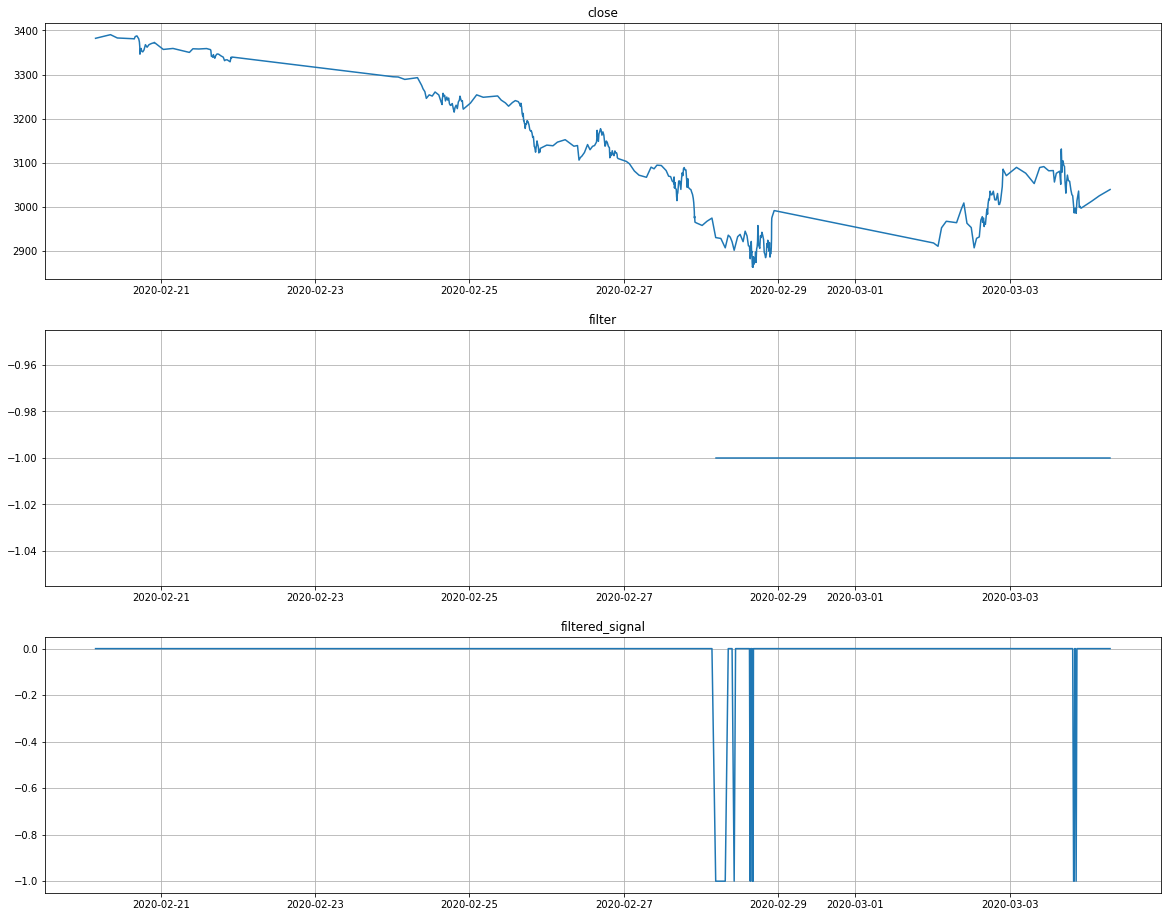

In [4]:
plot(data[['close', 'filter', 'filtered_signal']]);

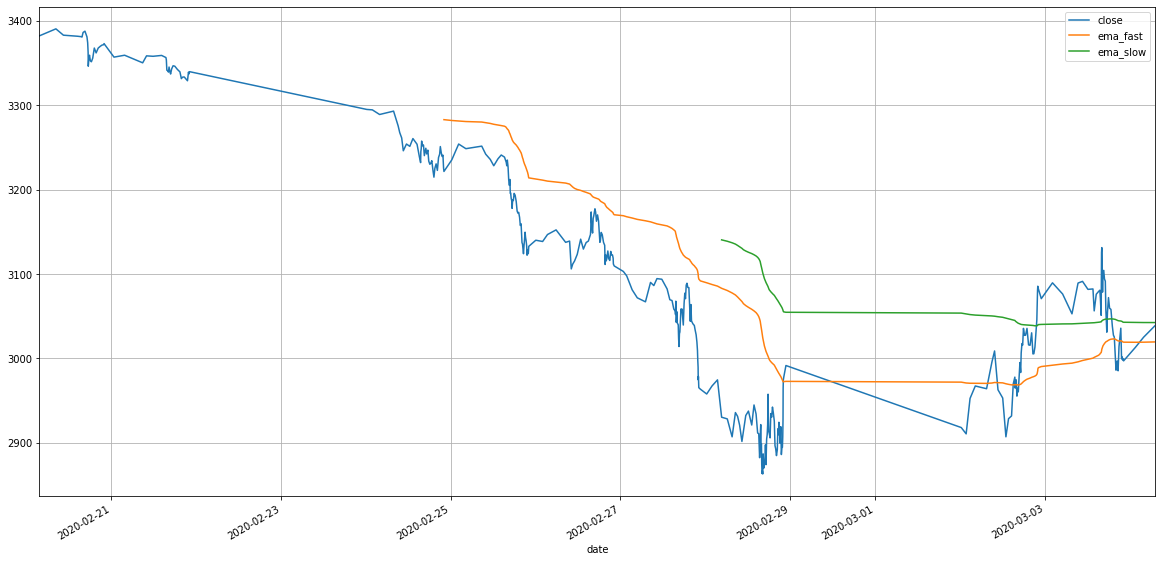

In [5]:
data[['close', 'ema_fast', 'ema_slow']].plot(figsize=(20,10), grid=True);

In [6]:
data.loc['20200228 15:00':]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-02-28 15:06:00,True,2911.75,2917.00,2899.00,2910.75,2910.75,78368,3049.452551,3118.131500,18.782111,0.0,-1.0,0.0
2020-02-28 15:20:30,True,2910.75,2912.00,2872.00,2882.25,2882.25,81149,3046.658348,3116.330818,19.028704,-1.0,-1.0,-1.0
2020-02-28 15:30:30,True,2882.25,2898.00,2872.75,2897.75,2897.75,78531,3044.170322,3114.664544,19.100966,0.0,-1.0,0.0
2020-02-28 15:34:30,True,2897.50,2918.50,2890.50,2913.75,2913.75,82407,3041.991594,3113.135074,19.204273,0.0,-1.0,0.0
2020-02-28 15:39:30,True,2914.00,2931.00,2912.75,2921.50,2921.50,83862,3039.979084,3111.678257,19.193201,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-03 21:59:30,True,2998.25,3006.25,2994.25,3000.00,3000.00,105021,3019.536200,3043.085122,25.230490,0.0,-1.0,0.0
2020-03-03 22:14:30,True,3000.00,3018.25,2994.00,2997.00,2997.00,93373,3019.163278,3042.773504,25.219536,0.0,-1.0,0.0
2020-03-04 01:31:30,True,2997.75,3016.75,2976.50,3012.75,3012.75,78451,3019.057156,3042.570598,25.387423,0.0,-1.0,0.0


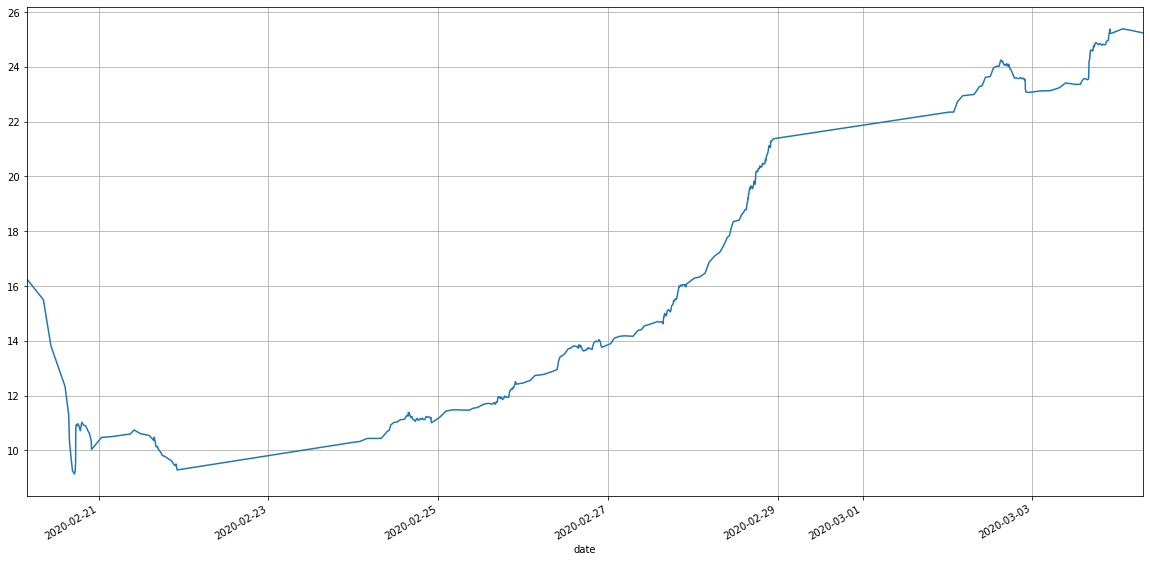

In [21]:
data['atr'].plot(figsize=(20, 10), grid=True);

In [7]:
data.loc['20180206':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-02-20 03:44:30,True,3391.75,3397.50,3381.25,3382.25,3382.25,78409,NaN,NaN,16.250000,0.0,NaN,0.0
2020-02-20 08:23:30,True,3382.00,3391.25,3376.50,3390.50,3390.50,78373,NaN,NaN,15.495833,0.0,NaN,0.0
2020-02-20 10:31:00,True,3390.50,3390.50,3380.00,3383.00,3383.00,78355,NaN,NaN,13.812018,0.0,NaN,0.0
2020-02-20 14:30:30,True,3383.00,3386.50,3378.50,3381.75,3381.75,79267,NaN,NaN,12.334708,0.0,NaN,0.0
2020-02-20 15:32:30,True,3381.75,3382.50,3375.25,3381.25,3381.25,78598,NaN,NaN,11.295043,0.0,NaN,0.0
2020-02-20 15:45:30,True,3381.50,3383.50,3377.75,3380.75,3380.75,79035,NaN,NaN,10.345008,0.0,NaN,0.0
2020-02-20 16:05:00,True,3380.75,3386.75,3379.50,3386.25,3386.25,79483,NaN,NaN,9.887990,0.0,NaN,0.0
2020-02-20 16:36:30,True,3386.50,3389.00,3384.00,3387.75,3387.75,79450,NaN,NaN,9.252968,0.0,NaN,0.0
2020-02-20 17:10:30,True,3387.50,3389.00,3380.75,3381.00,3381.00,78812,NaN,NaN,9.136510,0.0,NaN,0.0


In [8]:
data['long'] = data['filtered_signal'] > 0
data['short'] = data['filtered_signal'] < 0
data['out'] = data['filtered_signal'] == 0
data['long'] = data['long'] * data['price']
data['short'] = data['short'] * data['price']
data['out'] = data['out'] * data['price']
data[['long', 'short', 'out']] = data[['long', 'short', 'out']].replace({0:np.nan})
data.tail()

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-03-03 21:59:30,True,2998.25,3006.25,2994.25,3000.00,3000.00,105021,3019.536200,3043.085122,25.230490,0.0,-1.0,0.0,NaN,NaN,3000.00
2020-03-03 22:14:30,True,3000.00,3018.25,2994.00,2997.00,2997.00,93373,3019.163278,3042.773504,25.219536,0.0,-1.0,0.0,NaN,NaN,2997.00
2020-03-04 01:31:30,True,2997.75,3016.75,2976.50,3012.75,3012.75,78451,3019.057156,3042.570598,25.387423,0.0,-1.0,0.0,NaN,NaN,3012.75
2020-03-04 03:53:30,True,3013.00,3031.00,3010.50,3025.00,3025.00,78309,3019.155492,3042.451915,25.332838,0.0,-1.0,0.0,NaN,NaN,3025.00
2020-03-04 07:15:00,True,3025.00,3041.25,3024.25,3039.25,3039.25,78306,3019.487991,3042.430298,25.239785,0.0,-1.0,0.0,NaN,NaN,3039.25


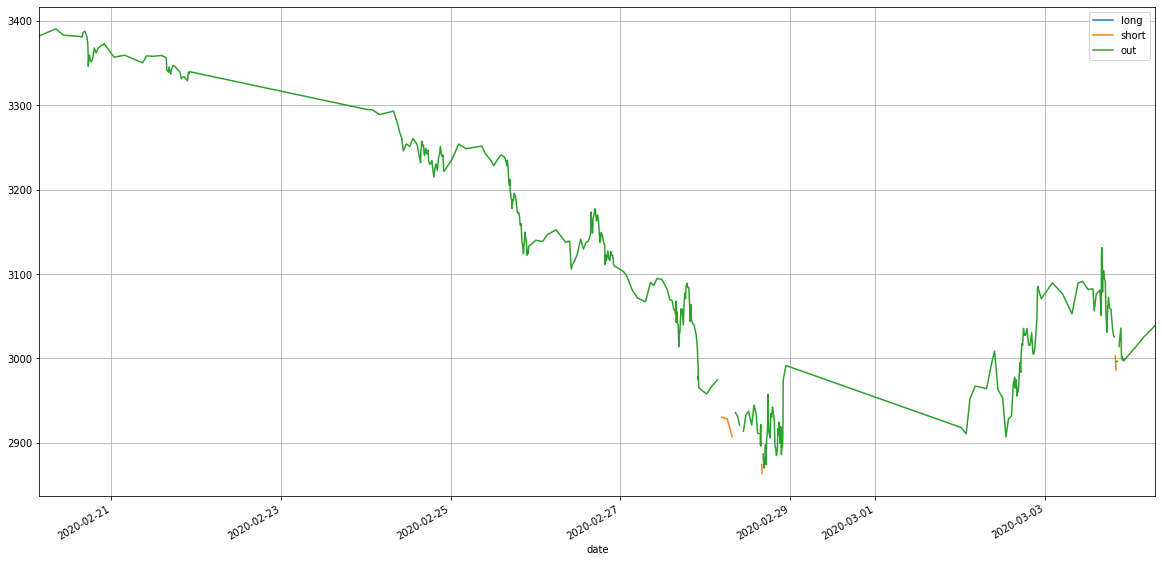

In [9]:
data[['long', 'short', 'out']].plot(figsize=(20, 10), grid=True);

In [10]:
periods = [10, 20, 40, 80, ]

In [11]:
min_max = pd.DataFrame({'close': data.price})

In [12]:
min_max

,close
date,
2020-02-20 03:44:30,3382.25
2020-02-20 08:23:30,3390.50
2020-02-20 10:31:00,3383.00
2020-02-20 14:30:30,3381.75
2020-02-20 15:32:30,3381.25
...,...
2020-03-03 21:59:30,3000.00
2020-03-03 22:14:30,2997.00
2020-03-04 01:31:30,3012.75


In [13]:
for p in periods:
    min_max[f'min_{p}'] = min_max.close.rolling(p).min()
    #min_max[f'max_{p}'] = min_max.close.rolling(p).max()

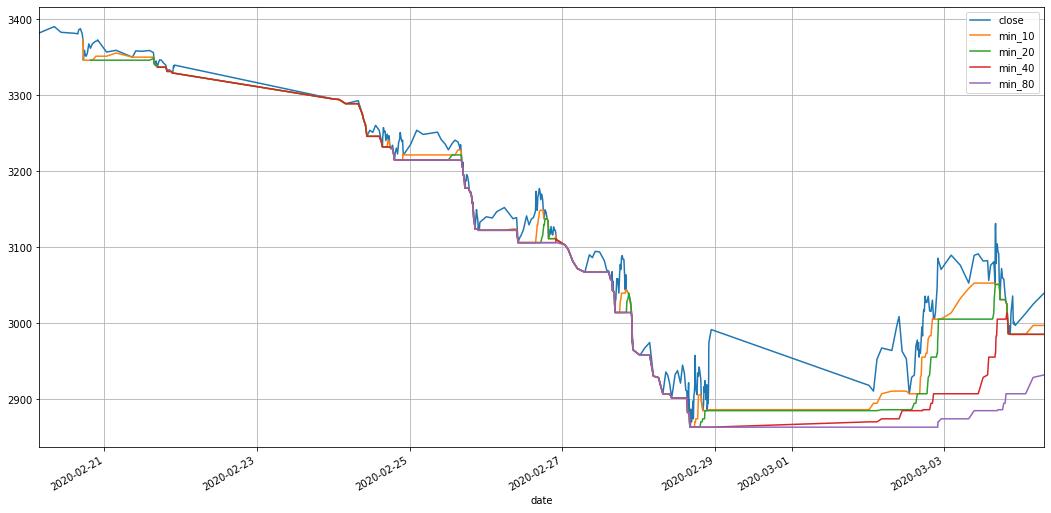

In [14]:
min_max.plot(figsize=(18, 9), grid=True);

In [15]:
data[data['signal'] != 0].loc['20190927':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-02-21 19:51:30,True,3339.50,3339.75,3331.25,3331.50,3331.50,80504,NaN,NaN,9.682222,-1.0,NaN,-0.0,NaN,NaN,3331.50
2020-02-21 21:35:30,True,3331.25,3334.50,3328.00,3329.00,3329.00,78361,NaN,NaN,9.439446,-1.0,NaN,-0.0,NaN,NaN,3329.00
2020-02-24 00:17:00,True,3340.00,3340.25,3289.50,3295.00,3295.00,78295,NaN,NaN,10.297808,-1.0,NaN,-0.0,NaN,NaN,3295.00
2020-02-24 01:51:30,True,3295.00,3303.75,3292.50,3294.50,3294.50,79566,NaN,NaN,10.320818,-1.0,NaN,-0.0,NaN,NaN,3294.50
2020-02-24 03:54:30,True,3294.25,3300.50,3285.50,3289.00,3289.00,80031,NaN,NaN,10.432428,-1.0,NaN,-0.0,NaN,NaN,3289.00
2020-02-24 09:09:00,True,3292.75,3293.50,3275.25,3275.50,3275.50,79094,NaN,NaN,10.615821,-1.0,NaN,-0.0,NaN,NaN,3275.50
2020-02-24 09:36:00,True,3275.75,3276.25,3262.25,3267.50,3267.50,79262,NaN,NaN,10.693588,-1.0,NaN,-0.0,NaN,NaN,3267.50
2020-02-24 10:09:00,True,3267.25,3269.50,3257.25,3261.25,3261.25,79082,NaN,NaN,10.728932,-1.0,NaN,-0.0,NaN,NaN,3261.25
2020-02-24 10:36:30,True,3261.25,3262.00,3242.50,3246.00,3246.00,79176,NaN,NaN,10.925815,-1.0,NaN,-0.0,NaN,NaN,3246.00


In [16]:
data[data['signal'] != 0].tail(60)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-02-25 19:02:00,True,3174.25,3176.50,3166.25,3172.00,3172.00,80362,3249.854210,NaN,11.954725,-1.0,NaN,-0.0,NaN,NaN,3172.00
2020-02-25 19:28:30,True,3173.00,3174.50,3162.25,3167.25,3167.25,78872,3246.894826,NaN,11.945309,-1.0,NaN,-0.0,NaN,NaN,3167.25
2020-02-25 19:41:30,True,3167.25,3169.00,3157.25,3157.50,3157.50,79700,3245.226064,NaN,11.942485,-1.0,NaN,-0.0,NaN,NaN,3157.50
2020-02-25 20:03:00,True,3159.75,3160.25,3143.00,3147.50,3147.50,80993,3241.842306,NaN,12.005330,-1.0,NaN,-0.0,NaN,NaN,3147.50
2020-02-25 20:10:00,True,3147.25,3151.25,3131.00,3137.00,3137.00,83399,3239.897452,NaN,12.123358,-1.0,NaN,-0.0,NaN,NaN,3137.00
2020-02-25 20:18:00,True,3137.00,3148.00,3132.25,3135.75,3135.75,79173,3237.969386,NaN,12.175107,-1.0,NaN,-0.0,NaN,NaN,3135.75
2020-02-25 20:28:30,True,3135.75,3142.00,3127.00,3128.00,3128.00,79016,3235.937569,NaN,12.215287,-1.0,NaN,-0.0,NaN,NaN,3128.00
2020-02-25 20:35:00,True,3128.00,3134.00,3121.25,3124.00,3124.00,79588,3233.873407,NaN,12.222868,-1.0,NaN,-0.0,NaN,NaN,3124.00
2020-02-25 21:36:00,True,3133.75,3134.00,3117.50,3122.25,3122.25,81495,3222.161246,NaN,12.388893,-1.0,NaN,-0.0,NaN,NaN,3122.25


In [17]:
averages = pd.DataFrame({'price': data.price,
                       'ema_fast': data.price.ewm(span=100).mean(),
                       'ema_slow': data.price.ewm(span=160).mean()})

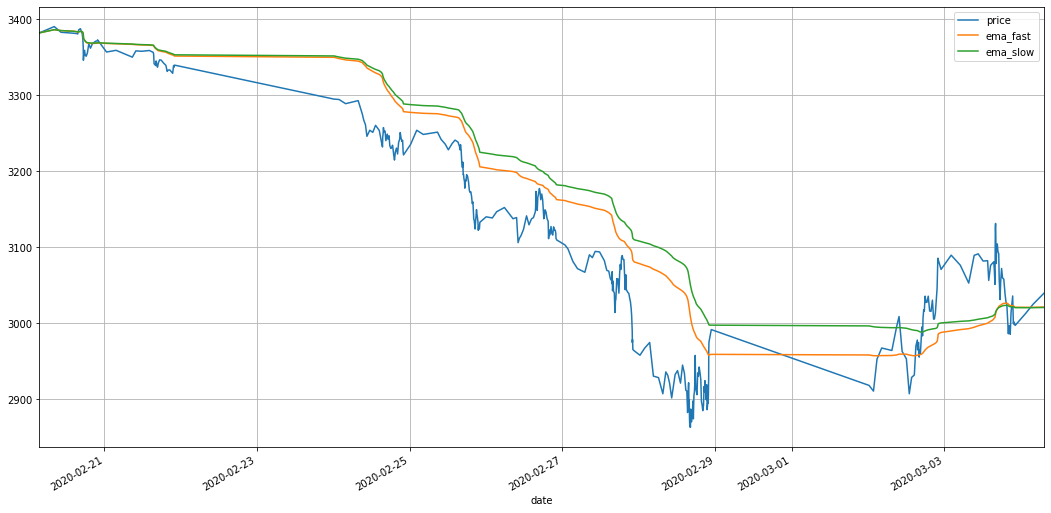

In [18]:
averages.plot(figsize=(18,9), grid=True);

In [19]:
data.loc['20180221':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-02-20 03:44:30,True,3391.75,3397.50,3381.25,3382.25,3382.25,78409,NaN,NaN,16.250000,0.0,NaN,0.0,NaN,NaN,3382.25
2020-02-20 08:23:30,True,3382.00,3391.25,3376.50,3390.50,3390.50,78373,NaN,NaN,15.495833,0.0,NaN,0.0,NaN,NaN,3390.50
2020-02-20 10:31:00,True,3390.50,3390.50,3380.00,3383.00,3383.00,78355,NaN,NaN,13.812018,0.0,NaN,0.0,NaN,NaN,3383.00
2020-02-20 14:30:30,True,3383.00,3386.50,3378.50,3381.75,3381.75,79267,NaN,NaN,12.334708,0.0,NaN,0.0,NaN,NaN,3381.75
2020-02-20 15:32:30,True,3381.75,3382.50,3375.25,3381.25,3381.25,78598,NaN,NaN,11.295043,0.0,NaN,0.0,NaN,NaN,3381.25
2020-02-20 15:45:30,True,3381.50,3383.50,3377.75,3380.75,3380.75,79035,NaN,NaN,10.345008,0.0,NaN,0.0,NaN,NaN,3380.75
2020-02-20 16:05:00,True,3380.75,3386.75,3379.50,3386.25,3386.25,79483,NaN,NaN,9.887990,0.0,NaN,0.0,NaN,NaN,3386.25
2020-02-20 16:36:30,True,3386.50,3389.00,3384.00,3387.75,3387.75,79450,NaN,NaN,9.252968,0.0,NaN,0.0,NaN,NaN,3387.75
2020-02-20 17:10:30,True,3387.50,3389.00,3380.75,3381.00,3381.00,78812,NaN,NaN,9.136510,0.0,NaN,0.0,NaN,NaN,3381.00
